In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate sample data (replace with your own 2D points)
points = np.random.rand(100, 2)

# Define the bandwidth (controls the smoothness of the density estimate)
bandwidth = 0.1

# Fit the KDE model to the data
kde = KernelDensity(bandwidth=bandwidth)
kde.fit(points)

# Generate a grid of points to evaluate the density
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
grid_points = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.vstack([grid_points[0].ravel(), grid_points[1].ravel()]).T

# Compute the log density for each grid point
log_density = kde.score_samples(grid_points)

# Exponentiate the log density to get the actual density values
density = np.exp(log_density)

# Print the density values for the first few points

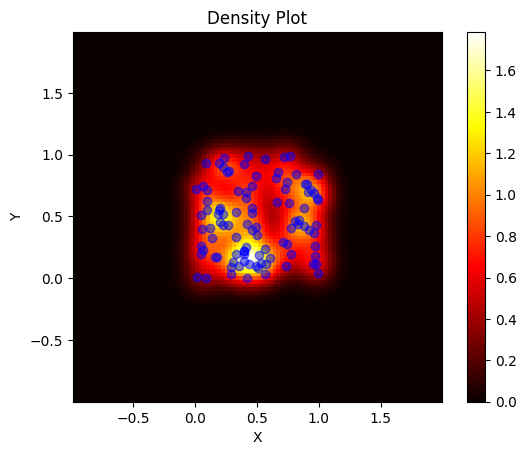

In [9]:
density = density.reshape(100, 100)

# Plot the density values
plt.imshow(density, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='hot')
plt.colorbar()
plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Plot')
plt.show()

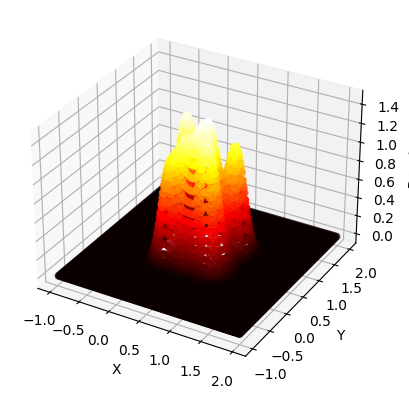

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity

# Generate sample data (replace with your own 2D points)
points = np.random.rand(100, 2)

# Define the bandwidth (controls the smoothness of the density estimate)
bandwidth = 0.1

# Fit the KDE model to the data
kde = KernelDensity(bandwidth=bandwidth)
kde.fit(points)

# Generate a grid of points to evaluate the density
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
grid_points = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.vstack([grid_points[0].ravel(), grid_points[1].ravel()]).T

# Compute the log density for each grid point
log_density = kde.score_samples(grid_points)

# Exponentiate the log density to get the actual density values
density = np.exp(log_density)

# Reshape the density values to match the grid shape
density = density.reshape(100, 100)

# Plot the density in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = grid_points[:, 0]
y = grid_points[:, 1]
z = density.ravel()

ax.scatter(x, y, z, c=z, cmap='hot')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')

plt.show()


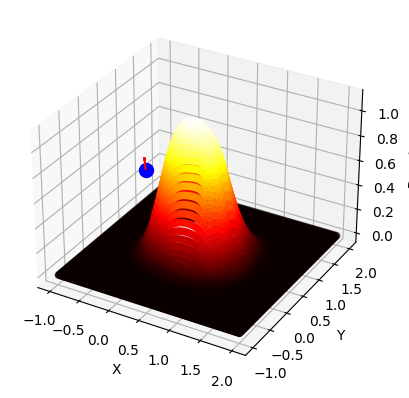

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity

# Generate sample data (replace with your own 2D points)
points = np.random.rand(100, 2)

# Define the bandwidth (controls the smoothness of the density estimate)
bandwidth = 0.2

# Fit the KDE model to the data
kde = KernelDensity(bandwidth=bandwidth)
kde.fit(points)

# Generate a grid of points to evaluate the density
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
grid_points = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.vstack([grid_points[0].ravel(), grid_points[1].ravel()]).T

# Compute the log density for each grid point
log_density = kde.score_samples(grid_points)

# Exponentiate the log density to get the actual density values
density = np.exp(log_density)

# Reshape the density values to match the grid shape
density = density.reshape(100, 100)

# Function to compute the gradient at a given point
def compute_gradient(x, y):
    dx = (density[y, x+1] - density[y, x-1]) / 2  # Partial derivative with respect to x
    dy = (density[y+1, x] - density[y-1, x]) / 2  # Partial derivative with respect to y
    return dx, dy

# Pick a point to compute the gradient
point_x = 50
point_y = 50

# Compute the gradient at the selected point
gradient_x, gradient_y = compute_gradient(point_x, point_y)

# Plot the density in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = grid_points[:, 0]
y = grid_points[:, 1]
z = density.ravel()

ax.scatter(x, y, z, c=z, cmap='hot')

# Plot the selected point
ax.scatter(x[point_x], y[point_y], z[point_x + point_y * 100], c='blue', s=100)

# Plot the gradient as an arrow
ax.quiver(x[point_x], y[point_y], z[point_x + point_y * 100], gradient_x, gradient_y, 0.1, color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')

plt.show()
